# In-Depth: Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of
supervised algorithms for both classification and regression.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Motivating Support Vector Machines
As part of our discussion of Bayesian classification, we learned a simple model describing the distribution of
each underlying class, and used these generative models to probabilistically deter‐
mine labels for new points. That was an example of generative classification; here we
will consider instead discriminative classification: rather than modeling each class, we
simply find a line or curve (in two dimensions) or manifold (in multiple dimensions)
that divides the classes from each other.
As an example of this, consider the simple case of a classification task, in which the
two classes of points are well separated

In [2]:
from sklearn.datasets import make_blobs

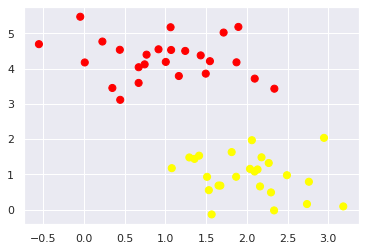

In [3]:
X,y = make_blobs(n_samples=50, centers=2,
                random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y, s=50,cmap='autumn')

A linear discriminative classifier would attempt to draw a straight line separating the
two sets of data, and thereby create a model for classification. For two-dimensional
data like that shown here, this is a task we could do by hand. But immediately we see
a problem: there is more than one possible dividing line that can perfectly discrimi‐
nate between the two classes!

(-1.0, 3.5)

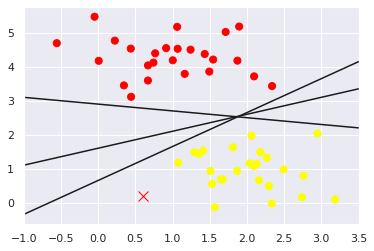

In [4]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[0.2],'x',color='red', markersize=10)

for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5)

These are three very different separators that, nevertheless, perfectly discriminate
between these samples. Depending on which you choose, a new data point (e.g., the
one marked by the “X” in Figure ) will be assigned a different label! Evidently our
simple intuition of “drawing a line between classes” is not enough, and we need to
think a bit deeper.

## Support Vector Machines: Maximizing the Margin
Support vector machines offer one way to improve on this. The intuition is this:
rather than simply drawing a zero-width line between the classes, we can draw
around each line a margin of some width, up to the nearest point. Here is an example
of how this might look

(-1.0, 3.5)

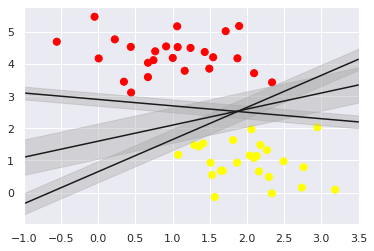

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d,
                     edgecolor='none', color='#AAAAAA',alpha=0.4)
plt.xlim(-1, 3.5)

In support vector machines, the line that maximizes this margin is the one we will
choose as the optimal model. Support vector machines are an example of such a max‐
imum margin estimator.

## Fitting a support vector machine
Let’s see the result of an actual fit to this data: we will use Scikit-Learn’s support vector
classifier to train an SVM model on this data. For the time being, we will use a linear
kernel and set the C parameter to a very large number (we’ll discuss the meaning of
these in more depth momentarily):

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what’s happening here, let’s create a quick convenience function
that will plot SVM decision boundaries for us

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

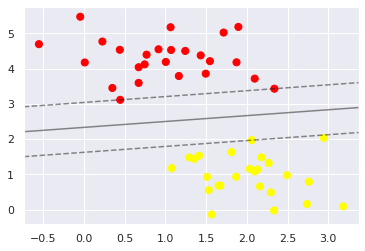

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin; they are indicated by
the black circles in Figure. These points are the pivotal elements of this fit, and
are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the
identity of these points is stored in the support_vectors_ attribute of the classifier:

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**A key to this classifier’s success is that for the fit, only the position of the support vec‐
tors matters; any points further from the margin that are on the correct side do not
modify the fit! Technically, this is because these points do not contribute to the loss
function used to fit the model, so their position and number do not matter so long as
they do not cross the margin.**

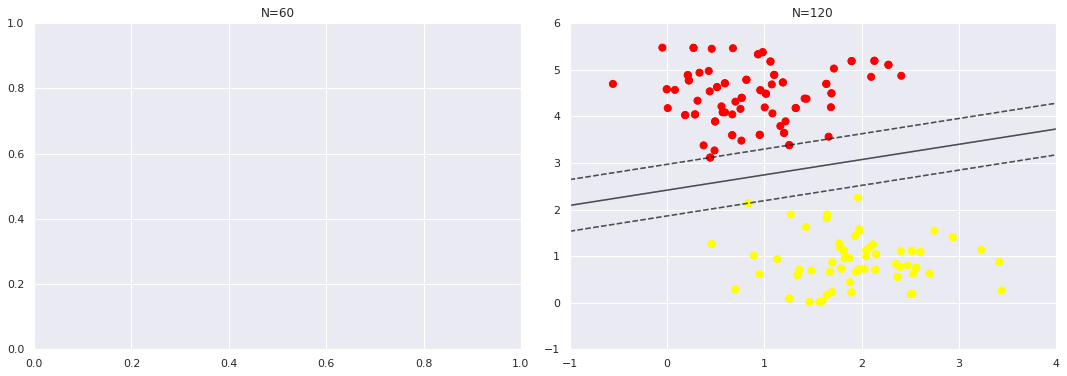

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax =plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,ax)
    axi.set_title("N={0}".format(N))

In the left panel, we see the model and the support vectors for 60 training points. In
the right panel, we have doubled the number of training points, but the model has
not changed: the three support vectors from the left panel are still the support vectors
from the right panel. This insensitivity to the exact behavior of distant points is one of
the strengths of the SVM model.

### Beyond linear boundaries: Kernel SVM
Where SVM becomes extremely powerful is when it is combined with kernels. We
have seen a version of kernels before, in the basis function regressions. There we projected our data into higher-dimensional
space defined by polynomials and Gaussian basis functions, and thereby were able to
fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea. To motivate the need for ker‐
nels, let’s look at some data that is not linearly separable

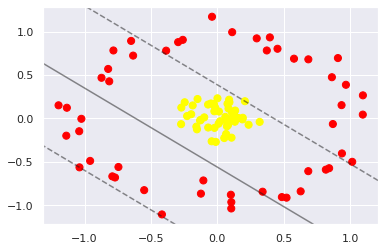

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will ever be able to separate this data. But we
can draw a lesson from the basis function regressions in  and think about how we might project the data into a higher
dimension such that a linear separator would be sufficient. For example, one simple
projection we could use would be to compute a radial basis function centered on the
middle clump:

In [12]:
r=np.exp(-(X**2).sum(1))

We can visualize this extra data dimension using a three-dimensional plot—if you are
running this notebook live, you will be able to use the sliders to rotate the plot

In [13]:
from mpl_toolkits import mplot3d

In [14]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [15]:
import ipywidgets as widgets

In [16]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

@interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
    X=fixed(X), y=fixed(y));

SyntaxError: invalid syntax (1197707600.py, line 10)

We can see that with this additional dimension, the data becomes trivially linearly
separable, by drawing a separating plane at, say, r=0.7.
Here we had to choose and carefully tune our projection; if we had not centered our
radial basis function in the right location, we would not have seen such clean, linearly
separable results. In general, the need to make such a choice is a problem: we would
like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at every point in the
dataset, and let the SVM algorithm sift through the results. This type of basis function
transformation is known as a kernel transformation, as it is based on a similarity rela‐
tionship (or kernel) between each pair of points.   
A potential problem with this strategy—projecting N points into N dimensions—is
that it might become very computationally intensive as N grows large. However,
because of a neat little procedure known as the kernel trick, a fit on kernel-
transformed data can be done implicitly—that is, without ever building the full N -
dimensional representation of the kernel projection! This kernel trick is built into the
SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to
an RBF (radial basis function) kernel, using the kernel model hyperparameter

In [17]:
clf=SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0)

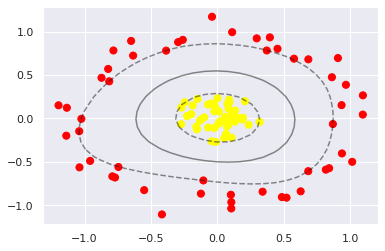

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision
boundary. This kernel transformation strategy is used often in machine learning to
turn fast linear methods into fast nonlinear methods, especially for models in which
the kernel trick can be used.

### Tuning the SVM: Softening margins
Our discussion so far has centered on very clean datasets, in which a perfect decision
boundary exists. But what if your data has some amount of overlap? For example, you
may have data like this

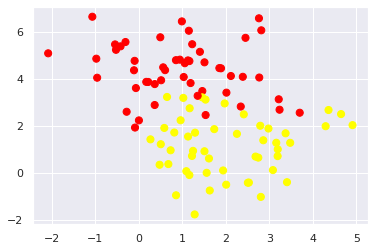

In [19]:
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

To handle this case, the SVM implementation has a bit of a fudge-factor that “softens”
the margin; that is, it allows some of the points to creep into the margin if that allows
a better fit. The hardness of the margin is controlled by a tuning parameter, most
often known as C. For very large C, the margin is hard, and points cannot lie in it. For
smaller C, the margin is softer, and can grow to encompass some points.

Text(0.5, 1.0, 'C = 0.1')

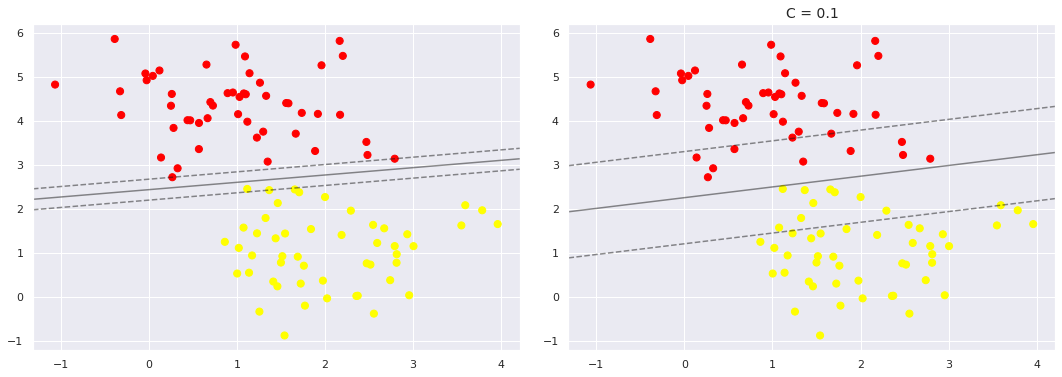

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');
axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the C parameter will depend on your dataset, and should be
tuned via cross-validation or a similar procedur

# Example: Face Recognition

As an example of support vector machines in action, let’s take a look at the facial rec‐
ognition problem. We will use the Labeled Faces in the Wild dataset, which consists
of several thousand collated photos of various public figures. A fetcher for the dataset
is built into Scikit-Learn:

In [31]:
from sklearn.datasets import fetch_lfw_people

In [32]:
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


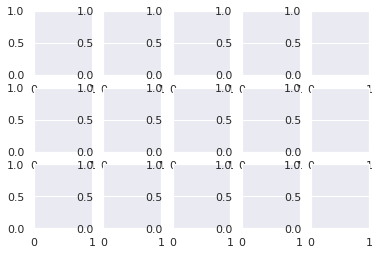

In [33]:
fig, ax = plt.subplots(3,5)
for i,ax in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[], xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classi‐
fier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [38]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [39]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [41]:
#For the sake of testing our classifier output, we will split the data into a training and
# testing set: lets test our model

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest=train_test_split(faces.data, faces.target,
                                            random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parame‐
ters. Here we will adjust C (which controls the margin hardness) and gamma (which
controls the size of the radial basis function kernel), and determine the best model:

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [46]:
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

CPU times: user 2min 39s, sys: 1min 20s, total: 4min
Wall time: 33 s
{'svc__C': 1, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we
would want to expand the grid to make sure we have found the true optimum.
Now with this cross-validated model, we can predict the labels for the test data, which
the model has not yet seen:

In [47]:
model=grid.best_estimator_
yfit=model.predict(Xtest)

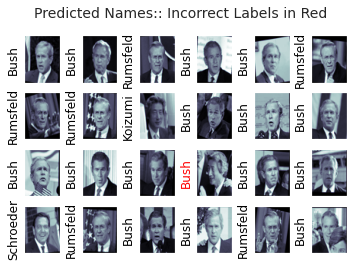

In [54]:
# lets look at a few of the test images along with their predicted values
fig,ax= plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names:: Incorrect Labels in Red',size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair). We can get a better sense of our esti‐
mator’s performance using the classification report, which lists recovery statistics
label by label:

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.82      0.78      0.80        36
    George W Bush       0.93      0.94      0.93       128
Gerhard Schroeder       0.84      0.93      0.88        28
Junichiro Koizumi       1.00      0.85      0.92        13

         accuracy                           0.90       205
        macro avg       0.90      0.87      0.88       205
     weighted avg       0.90      0.90      0.90       205



Text(89.18, 0.5, 'Predicted Labels')

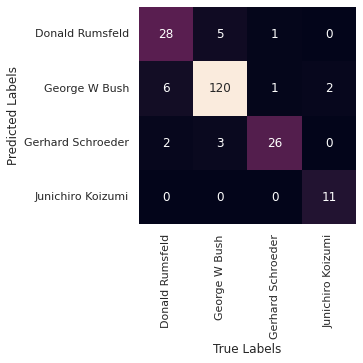

In [56]:
#let's display the confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest, yfit)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')

**For a real-world facial recognition task, in which the photos do not come precropped
into nice grids, the only difference in the facial classification scheme is the feature
selection: you would need to use a more sophisticated algorithm to find the faces, and
extract features that are independent of the pixellation. For this kind of application,
one good option is to make use of OpenCV, which among other things, includes pre‐
trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.**

## Support Vector Machine Summary
We have seen here a brief intuitive introduction to the principals behind support vec‐
tor machines. These methods are a powerful classification method for a number of
reasons:

• Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.  
• Once the model is trained, the prediction phase is very fast.  
• Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.  
• Their integration with kernel methods makes them very versatile, able to adapt to many types of data.  
However, SVMs have several disadvantages as well:

• The scaling with the number of samples N is � N 3 at worst, or � N 2 for efficient implementations. For large numbers of training samples, this computa‐
tional cost can be prohibitive.  
• The results are strongly dependent on a suitable choice for the softening parameter C. This must be carefully chosen via cross-validation, which can be expensive
as datasets grow in size.  
• The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.  

With those traits in mind, I generally only turn to SVMs once other simpler, faster,
and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating
an SVM on your data, the method can lead to excellent results